17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
196/196 [==============================] - 226s 1s/step - loss: 0.4201 - accuracy: 0.8063 - val_loss: 0.3002 - val_accuracy: 0.8750
Epoch 2/10
196/196 [==============================] - 215s 1s/step - loss: 0.2348 - accuracy: 0.9114 - val_loss: 0.3251 - val_accuracy: 0.8587
Epoch 3/10
196/196 [==============================] - 216s 1s/step - loss: 0.1772 - accuracy: 0.9370 - val_loss: 0.3375 - val_accuracy: 0.8656
Epoch 4/10
196/196 [==============================] - 217s 1s/step - loss: 0.1295 - accuracy: 0.9553 - val_loss: 0.4124 - val_accuracy: 0.8622
Epoch 5/10
196/196 [==============================] - 217s 1s/step - loss: 0.2468 - accuracy: 0.8912 - val_loss: 0.4234 - val_accuracy: 0.8379
Epoch 6/10
196/196 [==============================] - 218s 1s/step - loss: 0.1472 - accuracy: 0.9456 - val_loss: 0.4475 - val_accuracy: 0.8588
Epoch 7/10
196/196 [==============================] - 219s 1s/step - loss: 0.

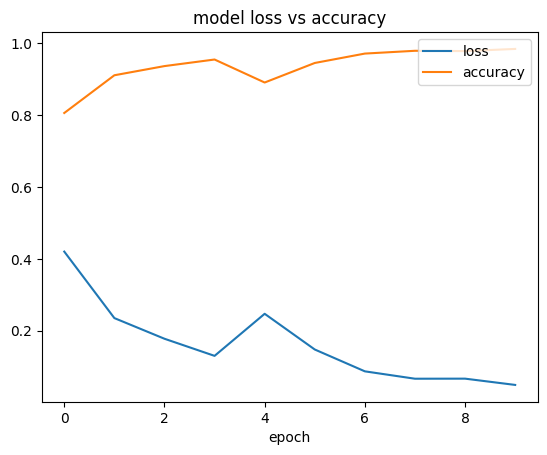

In [ ]:
# Bi directional LSTM
import numpy as np
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=10,
validation_data=[x_test, y_test])
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
print(history.history['loss'])
print(history.history['accuracy'])
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()